In [1]:
# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-12-07 17:07:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  23.1MB/s    in 8.1s    

2023-12-07 17:07:19 (19.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
import zipfile

In [3]:
zip_ref = zipfile.ZipFile("/content/10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)

train_data_path = "/content/10_food_classes_10_percent/train"
test_data_path = "/content/10_food_classes_10_percent/test"

train_data = train_data_gen.flow_from_directory(train_data_path, target_size=(284, 284), color_mode='rgb',
                                                class_mode='categorical', batch_size=32
                                                )



Found 750 images belonging to 10 classes.


In [6]:
test_data = test_data_gen.flow_from_directory(test_data_path, target_size=(284,284), color_mode='rgb',
                                              class_mode='categorical', batch_size=32)

Found 2500 images belonging to 10 classes.


In [7]:
import tensorflow as tf

In [17]:
import datetime
def create_tensorboard_callback(directory, experiment_name):
  dir = directory + "/"+ experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir = dir
  )

  print(f"Saving log files to : {dir}")
  return tensorboard_callback

In [10]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [11]:
# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [12]:
IMAGE_SHAPE = (284, 284)

In [13]:
feature_extraction_layer = hub.KerasLayer(efficientnet_url, trainable=False, name="feature_extraction_layer",
                                          input_shape=IMAGE_SHAPE+(3,))

In [14]:
model = tf.keras.Sequential([
    feature_extraction_layer,
    layers.Dense(10, activation='softmax', name='output_layer')
])

In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [18]:
model_history = model.fit(train_data,
                          epochs=3,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=[create_tensorboard_callback("tensorflow_hub", "EfficientNetB0")])

Saving log files to : tensorflow_hub/EfficientNetB0/20231207-170900
Epoch 1/3
24/24 [==============================] - 32s 632ms/step - loss: 1.8384 - accuracy: 0.4387 - val_loss: 1.3128 - val_accuracy: 0.7100
Epoch 2/3
24/24 [==============================] - 13s 543ms/step - loss: 1.0906 - accuracy: 0.7493 - val_loss: 0.8872 - val_accuracy: 0.8168
Epoch 3/3
24/24 [==============================] - 13s 547ms/step - loss: 0.7889 - accuracy: 0.8387 - val_loss: 0.7126 - val_accuracy: 0.8484


In [19]:
import pandas as pd

<Axes: >

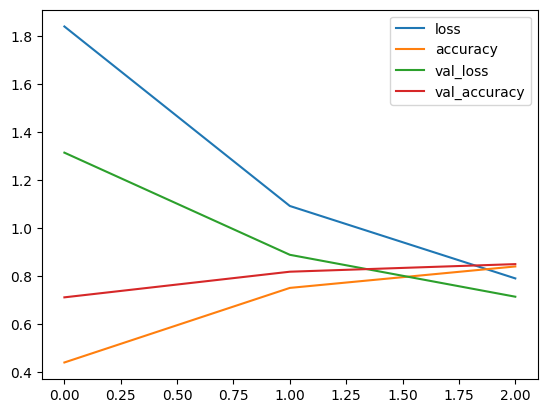

In [20]:
pd.DataFrame(model_history.history).plot()